In [40]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import tensorflow as tf
from tensorflow import keras

In [63]:
plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (15, 10)

## Introduction

According to Géron (2019), Keras is a high-level deep learning API which can be accessed through the tensorflow package. To perform the heavy computations required to train neural networks, Keras package can access three different backends: 

> 1) TensorFlow
> 2) Theano
> 3) Microsoft Cognitive Toolkit 

Keras package can be used as a wrapper that simplies the trainning, valiation and and of deep learning models. More concreately, Keras API can be accessed and used by importing the tensorflow python lib.

Below you can see a figure extracted from Géron (2019), which shows how your code will interact with Keras by making use of the tensorflow library.

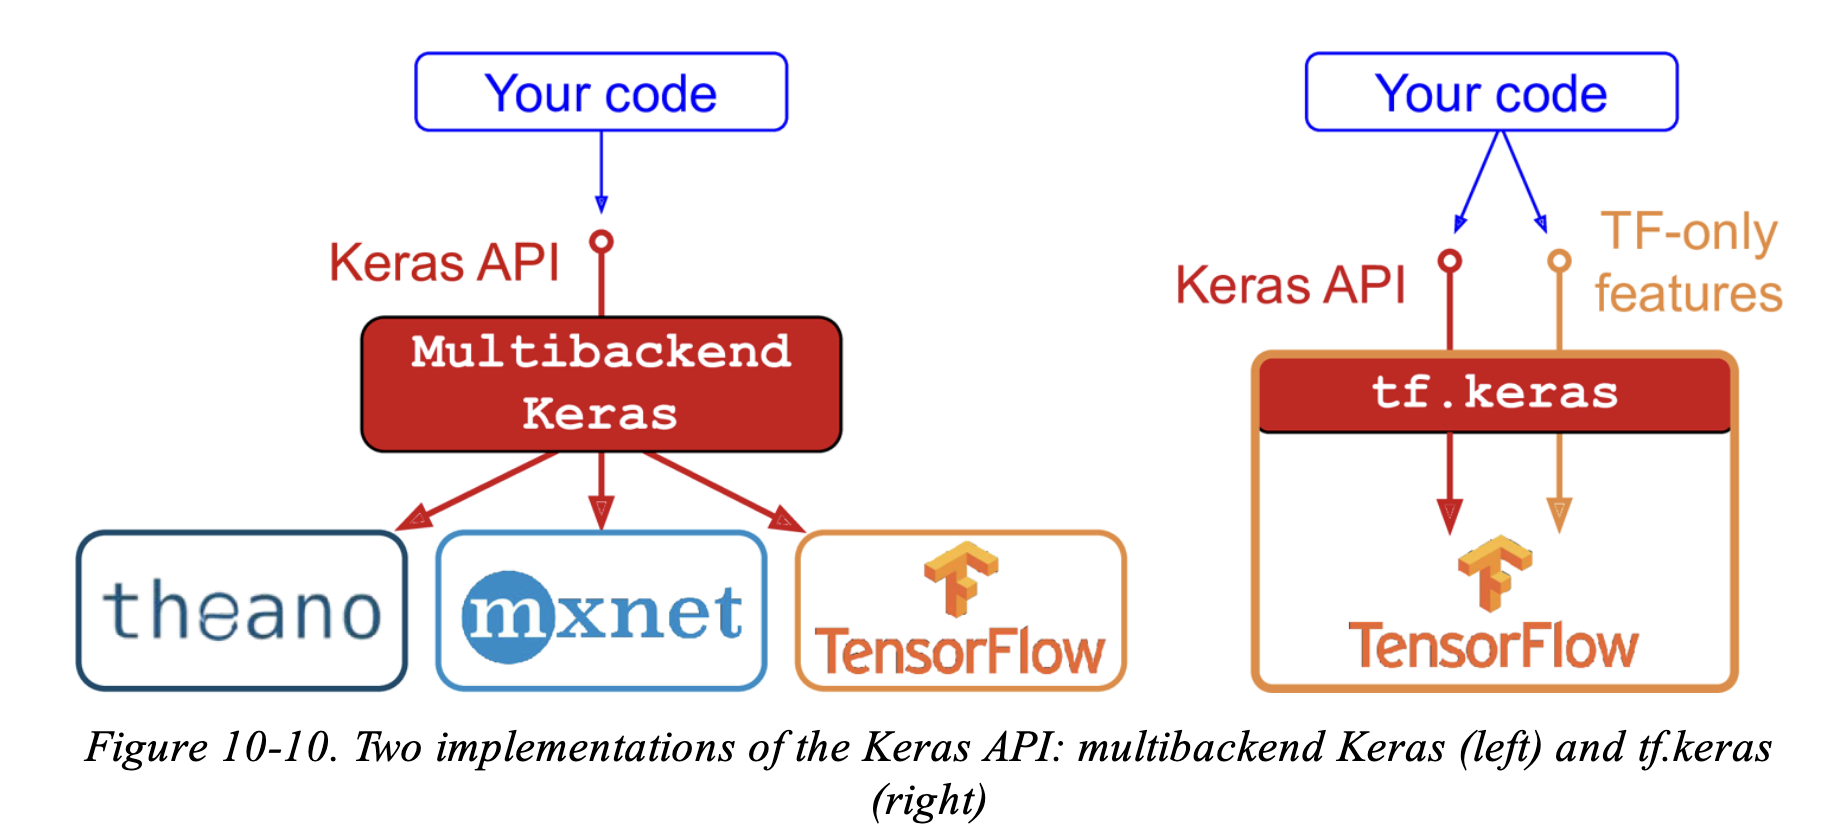

## 1. TensorFlow installation

After installing the package, we can check if everything is up-to-date:

In [4]:
tf.__version__

'2.0.0'

In [5]:
keras.__version__

'2.2.4-tf'

## 2. Building an Image Classifier Using the Sequential API

The fashion MNIST dataset is composed of 6000 images of fashion items, each of which represented in a 28x28 matrix. The values inside the matrices range from 0 to 255, and represent the intensity of the black/white colour in the picture.

Below you can see a figure extracted from Géron (2019):

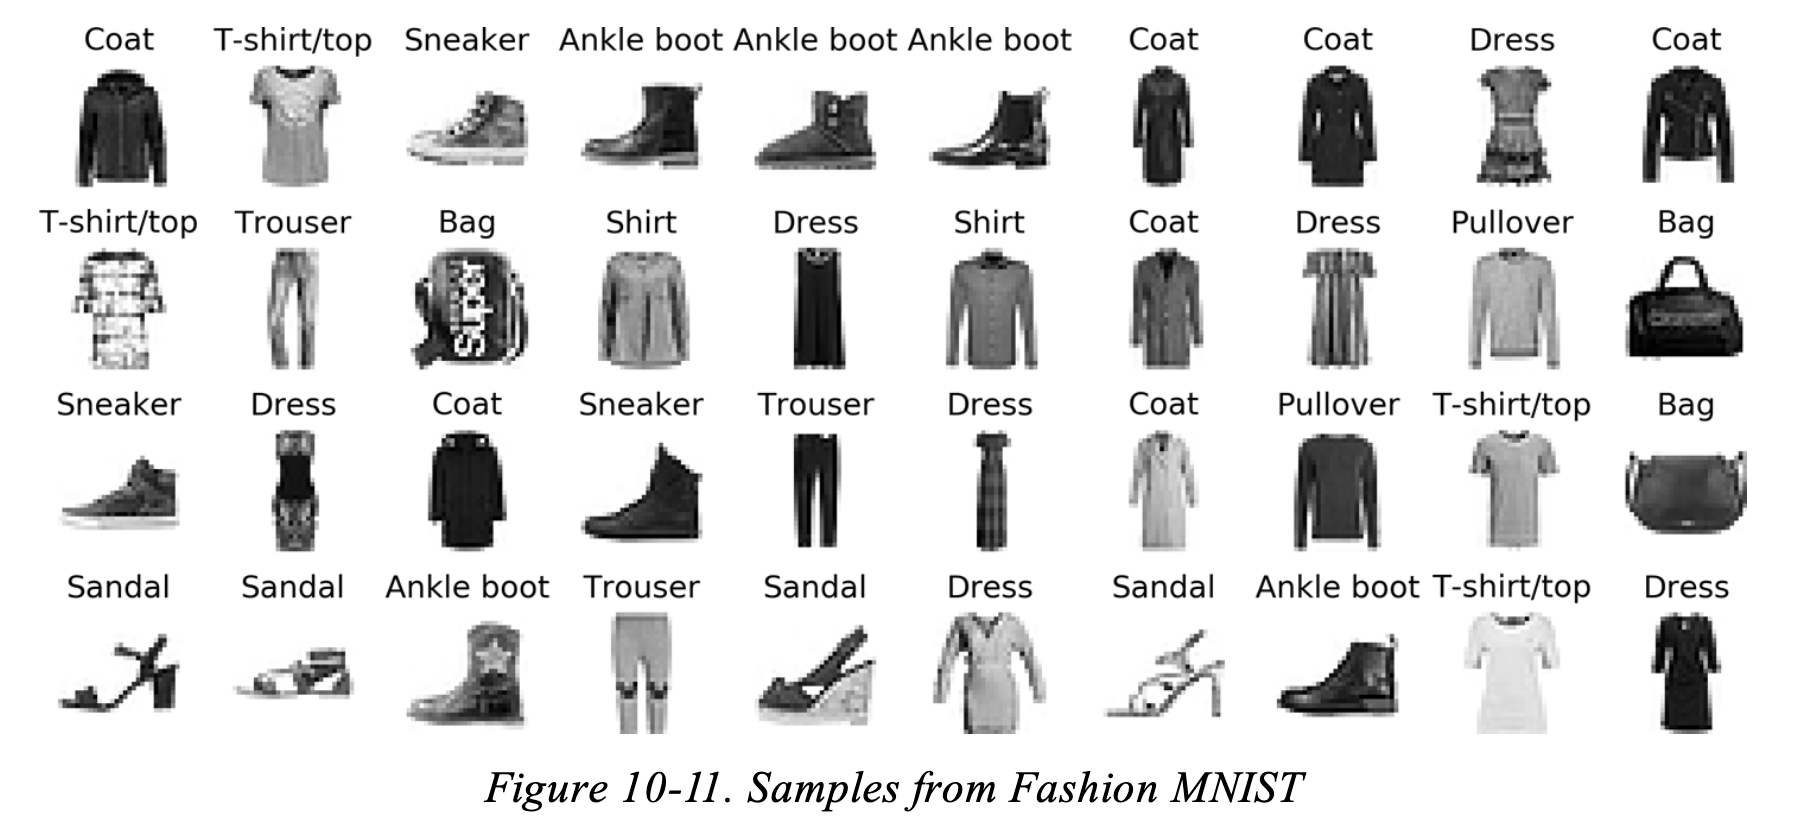

In [6]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
y_train_full.shape

(60000,)

In [8]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

Since the dataset does not have a validation set, we separate part of the trainnig data for validation purpose. Furthurmore, Géron (2019) chose to normalize the pixels values to become between 0 and 1. Thus, they divide the pixels by 255.

In [14]:
validation_size = 5000

X_valid, X_train = X_train_full[:validation_size] / 255.0, X_train_full[validation_size:] / 255.0
y_valid, y_train = y_train_full[:validation_size], y_train_full[validation_size:]

Each fashion item is attibuted to a number in the $\textbf{y}$ vector. To facilitate the classification tasks, the authors of the dataset provide names which represent each of the numbers.

Below you can find an example of this one-to-one representation:

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

### Modelling framework using the sequential API

Lets go through the lines of code below:

> 1) The "Sequential" model builds a plain stack generic neural network structure where each layer has exactly one input tensor and one output tensor;
> 2) The "Flatten" function is reponsible for the preprocessing of the input image. It converts the 28x28 matrix into a 1d array;
> 3) The "Dense" function builds a fully connected hidden layer, each of which responsible for managing its weight matrix. The relevant parameters are ([a complete list of parameters can be found at this link](https://keras.io/api/layers/core_layers/dense/)):

>> a) "units": number of units in the hidden layer;

>> b) "activation": activation function to be usedb between hidden layers;

> 4) The last layer is similar to the hidden layers, but it has 10 units (one for each fashion object) and, instead of having a the reLu activation function, it uses the softmax function (because the classes are exclusive ???).


In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(units=300, activation="relu"))
model.add(keras.layers.Dense(units=100, activation="relu"))
model.add(keras.layers.Dense(units=10, activation="softmax"))

Furthermore, the above code can be writen equivalently, but more compactly, as follows:

In [31]:
model = keras.models.Sequential(

    [ 
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(units=300, activation="relu"),
        keras.layers.Dense(units=100, activation="relu"),
        keras.layers.Dense(units=10, activation="softmax"),
    ]
    
)

Below we print the summary of the model. Despite the fact that the model is not really deep (only three hidden layers) it is really wide (many parameters per layer). For instance, the first hidden layer has (784 x 300) + 300 parameters, where 784 is the number of inputs in the input layer, 300 is the number of weights vectors in the first hidden layer, and 300 is the number of bias weight inside each weight vector.

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Another way of accessing the layers of a model is by indexing as follows:

In [34]:
model.layers

### Compiling the model

Some considerations on the choice of the parameters of the function is as follows:

> 1) The chosen loss function is the "sparse_categorical_crossentropy" because the data is categorial and has more than two categories. If the output had one target probability per class (such as one-hot vectors), than the "categorical_crossentropy" would be prefered (????), and if we had binary output than "binary_crossentropy" loss is prefered;
> 2) The optimizer "sgd" means stochastic gradient descent algorithm (sgd automatically sets lr=0.01);
> 3) Finally, the accuracy is measured by counting binary true/false results in the training model.

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 144us/sample - loss: 0.7216 - accuracy: 0.7666 - val_loss: 0.4995 - val_accuracy: 0.8314
Epoch 2/30
55000/55000 [==============================] - 7s 128us/sample - loss: 0.4875 - accuracy: 0.8303 - val_loss: 0.4529 - val_accuracy: 0.8428
Epoch 3/30
55000/55000 [==============================] - 7s 128us/sample - loss: 0.4456 - accuracy: 0.8429 - val_loss: 0.4176 - val_accuracy: 0.8558
Epoch 4/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4172 - accuracy: 0.8540 - val_loss: 0.3998 - val_accuracy: 0.8628
Epoch 5/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.3973 - accuracy: 0.8598 - val_loss: 0.3900 - val_accuracy: 0.8612
Epoch 6/30
55000/55000 [==============================] - 7s 127us/sample - loss: 0.3802 - accuracy: 0.8666 - val_loss: 0.4028 - val_accuracy: 0.8568
Epoch 7/30
55000/55000 [===========================



Instead of passing the validation set explicitly, we can make use of the "validation_split" argument to set the percentage of the day to be used as validation.

Below you can see an example of it:

In [38]:
history_auto_val_split = model.fit(X_train,
                                   y_train,
                                   epochs=30,
                                   validation_split=0.1)

Train on 49500 samples, validate on 5500 samples
Epoch 1/30
49500/49500 [==============================] - 7s 139us/sample - loss: 0.2201 - accuracy: 0.9211 - val_loss: 0.2209 - val_accuracy: 0.9213
Epoch 2/30
49500/49500 [==============================] - 7s 132us/sample - loss: 0.2159 - accuracy: 0.9233 - val_loss: 0.2495 - val_accuracy: 0.9078
Epoch 3/30
49500/49500 [==============================] - 6s 130us/sample - loss: 0.2134 - accuracy: 0.9238 - val_loss: 0.2219 - val_accuracy: 0.9171
Epoch 4/30
49500/49500 [==============================] - 7s 132us/sample - loss: 0.2093 - accuracy: 0.9260 - val_loss: 0.2148 - val_accuracy: 0.9213
Epoch 5/30
49500/49500 [==============================] - 7s 132us/sample - loss: 0.2051 - accuracy: 0.9263 - val_loss: 0.2280 - val_accuracy: 0.9135
Epoch 6/30
49500/49500 [==============================] - 6s 127us/sample - loss: 0.2017 - accuracy: 0.9275 - val_loss: 0.2634 - val_accuracy: 0.9022
Epoch 7/30
49500/49500 [===========================

In [52]:
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.240309,0.914109,0.309115,0.8870
26,0.236246,0.915673,0.289872,0.8938
27,0.232378,0.917473,0.285565,0.8942
28,0.228085,0.918909,0.299965,0.8914
29,0.224181,0.919345,0.294401,0.8930


<AxesSubplot:>

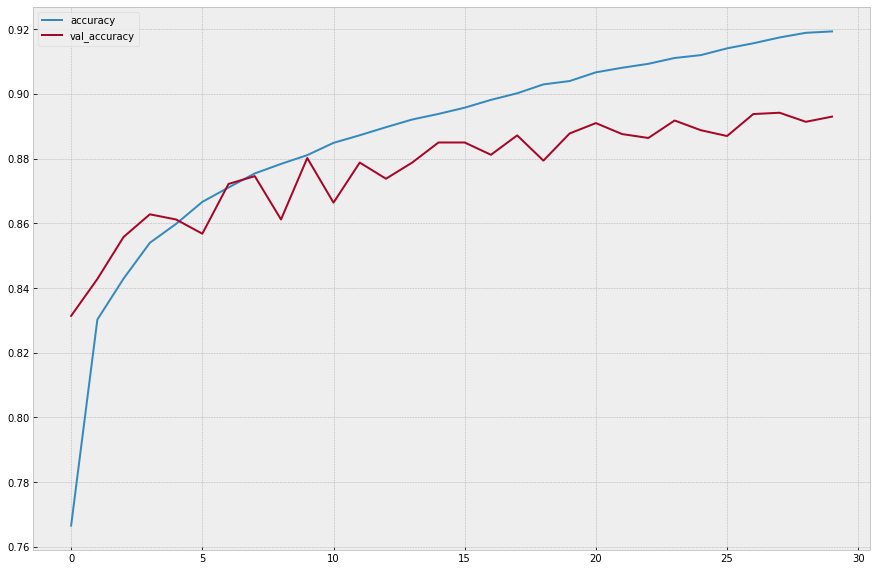

In [54]:
history_df[["accuracy", "val_accuracy"]].plot() 

If you are not satisfied with the accuracy on the trainnig and validation set, below hyperparameters can be further tuned to achieve a better performance:

> 1) Learning rate
> 2) Optimizer
> 3) Number of layers
> 4) Number of neurons per layer
> 5) Actvation function per hidden layer
> 6) Batch size

Once we have achieved the final model, we can use it to forecast new instances in the test set.

In [ ]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[82.49833623657227, 0.8436]

### Using the model to make predictions

Finally, we can use the model to make predictions on new instances. Since we don't have really new instances, we just use the first three pictures from the test data.

For each of the three pictures, the model estimate probabilities for each of the nine classes. As we can see, the model is pretty much certain that the first picture is a ankle boot, the second is a pullover, and the last one is a trouser.

In [58]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [59]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [60]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [64]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Below you can see the actual result of the pictures. Indeed, the model has predicted the correct classes for all three picutres.

In [65]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)